<a href="https://colab.research.google.com/github/athenaap/data_science_hw/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Q1-Read the data https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv
data = pd.read_csv("https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv")

The description of dataset is given below.

•	ID: Uniquely identifies each observation (diamond)

•	Carat Weight: The weight of the diamond in metric carats. One carat is equal to 0.2 grams, roughly the same weight as a paperclip

•	Cut: One of five values indicating the cut of the diamond in the following order of desirability (Signature-Ideal, Ideal, Very Good, Good, Fair)

•	Color: One of six values indicating the diamond's color in the following order of desirability (D, E, F - Colorless, G, H, I - Near colorless)

•	Clarity: One of seven values indicating the diamond's clarity in the following order of desirability (F - Flawless, IF - Internally Flawless, VVS1 or VVS2 - Very, Very Slightly Included, or VS1 or VS2 - Very Slightly Included, SI1 - Slightly Included)

•	Polish: One of four values indicating the diamond's polish (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Symmetry: One of four values indicating the diamond's symmetry (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Report: One of of two values "AGSL" or "GIA" indicating which grading agency reported the qualities of the diamond qualities

•	Price: The The amount in USD that the diamond is valued


In [3]:
#Q2-Get first 2 rows of data
data.head(2)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470


In [ ]:
#Q3-Check if there is missing value
print(data.isnull().sum())

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

In [8]:
#Q4- Get data information and number of rows and columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [10]:
#Q5-Get descriptive statistics of data
data.describe()

,Carat Weight,Price
count,6000.000000,6000.000000
mean,1.334520,11791.579333
std,0.475696,10184.350051
min,0.750000,2184.000000
25%,1.000000,5150.500000
50%,1.130000,7857.000000
75%,1.590000,15036.500000
max,2.910000,101561.000000


<Axes: >

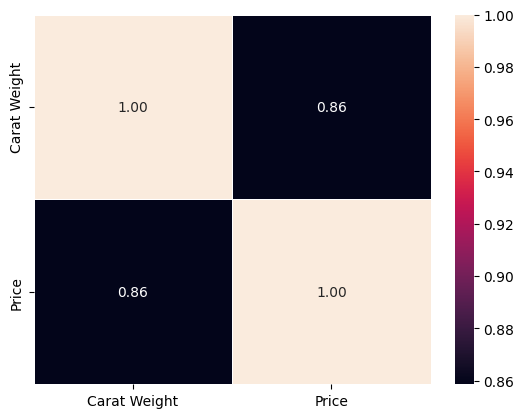

In [30]:
#Q6-Use seasoborns heat map to generate following heatmap
# annot = True to print the correlation inside the square
selected_columns = ["Carat Weight", "Price"]  # Ensure exact match
corr_matrix = data[selected_columns].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)


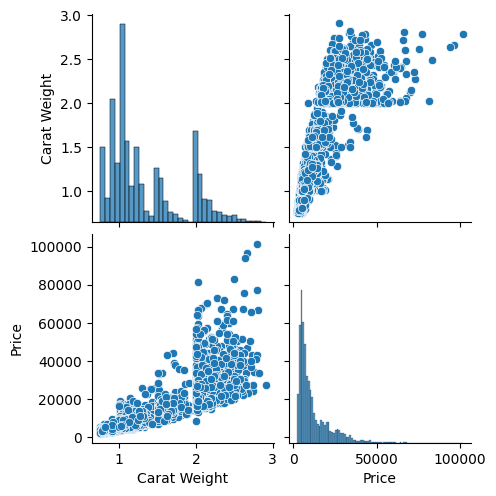

In [12]:
#Q7-Use seasoborns paiplot to generate following  diagram
sns.pairplot(data)

In [31]:
#Q8-Divide the data so that get Price as ouput variable (Y) and other variables as input varable (X)
X = data.drop("Price", axis=1)
y = data["Price"]


In [32]:
#Q9-Create dummy for the input variables (X)
X = pd.get_dummies(X)

In [34]:
#Q10 -Split the input and output data into two parts: test data (20%) and train data(%80)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print( X_train.shape)
print( X_test.shape)
print( y_train.shape)
print( y_test.shape)


(4800, 29)
(1200, 29)
(4800,)
(1200,)


In [35]:
def evalmetric(y,ypred):
 import numpy as np
 e = y - ypred
 mse_f = np.mean(e**2)
 rmse_f = np.sqrt(mse_f)
 mae_f = np.mean(abs(e))
 mape_f = 100*np.mean(abs(e/y))
 r2_f = 1-(sum(e**2)/sum((y-np.mean(y))**2))
 print("MSE:", mse_f)
 print("RMSE:", rmse_f)
 print("MAE:",mae_f)
 print("MAPE:",mape_f)
 print("R-Squared:", r2_f)

In [40]:
#Q11 Use Linear regression to evaluate the performance of test and train data of Linear model  using evalmetric
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

evalmetric(y_train, train_pred)
evalmetric(y_test, test_pred)

MSE: 13617878.611029437
RMSE: 3690.240996334716
MAE: 2420.3923973752344
MAPE: 28.43621397414528
R-Squared: 0.8677546171602638
MSE: 16395263.35943688
RMSE: 4049.1064890216066
MAE: 2386.881758705482
MAPE: 27.9843246727865
R-Squared: 0.8461544250476121


Q12 -Based on the performance of test and training model, can we say there is overfitting or not in the performace of liner model?

Answer: The results of test data and training data are amost the same, so i don't see any overfitting here

In [41]:
#Q13- Use Lasso regression to evaluate the performance of test and train data   using evalmetric
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
evalmetric(y_train, train_pred)
evalmetric(y_test, test_pred)

MSE: 13620186.418222288
RMSE: 3690.5536736677177
MAE: 2418.6060989645284
MAPE: 28.3861829971279
R-Squared: 0.8677322056779423
MSE: 16397475.87123393
RMSE: 4049.379689685067
MAE: 2384.421619630618
MAPE: 27.923271021548462
R-Squared: 0.846133663859332


In [42]:
#Q14 Use Ridge regreesionto evaluate the performance of test and train data   using evalmetric
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
evalmetric(y_train, train_pred)
evalmetric(y_test, test_pred)

MSE: 13646548.843169976
RMSE: 3694.1235554824066
MAE: 2422.9559862611777
MAPE: 28.470060203328458
R-Squared: 0.8674761959807372
MSE: 16386346.26392039
RMSE: 4048.0052203425316
MAE: 2389.45222000256
MAPE: 28.022200369524814
R-Squared: 0.8462380989512615


Q15- Did you get any improvement on test data using Ridge and Lasso?
Explain why?

Answer: We don't get much improvement with Lasso and Ridge, because they are mainly used to reduce complexity so that the model doesn't overfit. In our initial Linear model we didn't have overfitting and therefore Lasso, Ridge also showed almost same results


In [43]:
#Q16-Use Decison Tree Regression to evaluate the performance of test and train data   using evalmetric
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
evalmetric(y_train, train_pred)
evalmetric(y_test, test_pred)

MSE: 83753.97633482143
RMSE: 289.40279254841585
MAE: 77.53468948412699
MAPE: 0.7629440866398477
R-Squared: 0.999186651828738
MSE: 3794290.4313668744
RMSE: 1947.8938449943505
MAE: 878.2609246031745
MAPE: 7.0624778983069945
R-Squared: 0.9643961319710066


In [44]:
#Q17-Use Random Forest to evaluate the performance of test and train data   using evalmetric
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
evalmetric(y_train, train_pred)
evalmetric(y_test, test_pred)

MSE: 433649.265972933
RMSE: 658.5205129477235
MAE: 305.6988121567321
MAPE: 2.4490488819323852
R-Squared: 0.9957887630786844
MSE: 1389494.803701535
RMSE: 1178.7683418303764
MAE: 637.9142143400811
MAPE: 5.385518447300062
R-Squared: 0.9869616228612896


Q18-Why Random forest perform better than Decison Tree on test data?

Answer: Decision tree has very high training data accuracy and lower test data accuracy, indicating that model is overfit. However Random Forest, uses mulltiple decision tress which doesn't let model overfit on training data. From results it is also apparent as training accuracy is less than in Decision tree model

Q19- Which regression technique among Linear Regresssion, Lasso Regression ,Ridge Regression, Decision Tree and Random Forest  provide best performance on test data?

Answer: We get best performance with Random Forest, which is predictable. Because, Random Forest is an ensemble model and therefore generalizes well, reduces noise and etc.
